### El modelo de Ising

$$ E = -J\sum_{\langle x,y \rangle}{\sigma_x \sigma_y} -  B  \sum_x{ \sigma_x}$$
Convención más común.

Si $J<0$  se favorecen spins paralelos y tenemos un *ferromagneto*.

Si $J>0$ se favorecen spins antiparalelos y tenemos un *antiferromagneto*.

  $$\alpha(\sigma \to \tau) = \frac{\pi(\tau)}{\pi(\sigma)} = \frac{e^{-\beta E(\tau)}}{e^{-\beta E(\sigma)}} = e^{-\beta [E(\tau)-E(\sigma)]} = e^{-\beta \Delta E}$$

 $$\alpha(\sigma \to \tau) = \min \Big\{1, \frac{\pi(\tau)}{\pi(\sigma)}\Big\} = \min \Big\{1,  e^{-\beta \Delta E}\Big\}$$
 
 El hamiltoneano del sistema es: $H=-J\sum{\sigma_i\sigma_j} - B\sum\sigma_i$ con $\sigma_i \in \{-1,1\} $

La energía de vecinos es: $E_v=-J(N_p-N_a)$ con $N_p$ el número de parejas paralelas y $N_a$ el número de parejas antiparalelas.

* Cuando se voltea un espín las parejas paralelas se vuelven antiparalelas y viceversa.
* Sólo hay que contar cuantas parejas paralelas $p$ y antiparalelas $a$ forma originalmente el espín a voltear.

$$N'_p = N_p-p+a$$
$$N'_a = N_a-a+p$$ 
$$E_v' = J(N'_p-N'_a) = J(N_p-p+a-N_a+a-p) = J(N_p-N_a)-2J(a-p) = E_v+2J(a-p)$$

$$ \Delta E_v = E_v'-E_v = 2J(a-p)$$

$$ \Delta E = \Delta E_v - 2B\tau_i = \Delta E_v + 2B\sigma_i$$

### El algoritmo de Wolff

Balance detallado: $$ \pi(a)\mathcal{P}(a \to b) = \pi(b)\mathcal{P}(b \to a) $$

$$ \mathcal{P}(a \to b) = \mathcal{A}(a \to b) p^{acept}(a \to b) $$
$$ \mathcal{P}(b \to a) = \mathcal{A}(b \to a) p^{acept}(b \to a) $$

Dado un cluster, la probabilidad de aceptar un espín externo paralelo a uno en la frontera es $(1-p)$.
Entonces, la probabilidad de aceptar al total de posibilidades es la multiplicación, por lo que si hay $M$ espines que podrían ser aceptados, la probabilidad de aceptarlos es: $$ \mathcal{A} \propto (1-p)^{M} $$

Más general, si hay $n_\uparrow$ espines esternos paralelos a la frontera y $n_\downarrow$ espines antiparalelos, la energía de la frontera en la configuración inicial es proporcional a $n_\uparrow-n_\downarrow$ y en la configuración volteada sería $n_\downarrow-n_\uparrow$.

El balance detallado resulta: $$ e^{-\beta(n_\downarrow-n_\uparrow)}(1-p)^{n_\uparrow}  p^{acept}(a \to b) = e^{-\beta(n_\uparrow-n_\downarrow)}(1-p)^{n_\downarrow}  p^{acept}(b \to a)$$

La probabilidad de aceptación según metrópolis es: $$ p^{acept}(a \to b) = \min \left [ 1, \frac{e^{-\beta(n_\uparrow-n_\downarrow))}(1-p)^{n_\downarrow}}{e^{-\beta(n_\downarrow-n_\uparrow)}(1-p)^{n_\uparrow}} \right ]  = \min \left [ 1, \left ( \frac{e^{-2\beta}}{1-p} \right )^{n_\uparrow}  \left ( \frac{1-p}{e^{-2\beta}} \right )^{n_\downarrow} \right ] $$

Existe un valor mágico para $p$ que evita los rechazos: $ (1-p) = e^{-2\beta} $

$$ p \equiv 1 - e^{-2\beta} $$

## El modelo de Heisemberg O(3) 2D

Los espines son ahora vectores normales:

$$ \vec S = (S^1,S^2,S^3)$$

$$ || \vec S_x || = 1 $$

### Generando un vector de dirección verdaderamente aleatoria.

#### Con coordenadas angulares

$$ \phi  = [0,2\pi)$$

$$ \theta = [0,\pi) $$

$$ \vec r = (\sin \phi \sin \theta, \cos \phi \sin \theta, \cos \theta) $$

In [1]:
using PyPlot, Colors

In [2]:
function rand_spin()
    ϕ = 2π*rand()
    θ = acos(2rand()-1)
    [sin(ϕ)*sin(θ), cos(ϕ)*sin(θ), cos(θ)]
end

rand_spin (generic function with 1 method)

In [3]:
function rand_spin2()
    ϕ = 2π*rand()
    θ = π*rand()
    [sin(ϕ)*sin(θ), cos(ϕ)*sin(θ), cos(θ)]
end

rand_spin2 (generic function with 1 method)

In [4]:
function rand_spins(N, M)
    
    matrix =  Matrix{Vector{Float64}}(N,M)
    
    for i in eachindex(matrix)
        matrix[i] = rand_spin()
    end
    matrix
end

rand_spins (generic function with 1 method)

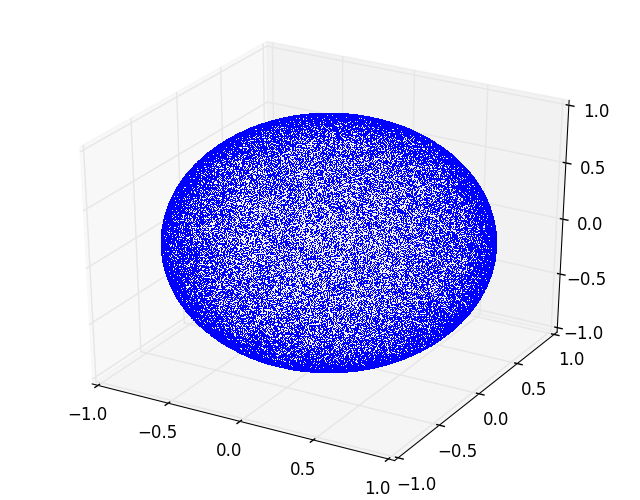

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f3c6cb99610>

In [5]:
n = 1000
m = 100
tam = n*m
buba = rand_spins(n,m)

xs = zeros(tam)
ys = zeros(tam)
zs = zeros(tam)
for i in eachindex(buba)
    xs[i] = buba[i][1]
    ys[i] = buba[i][2]
    zs[i] = buba[i][3]
end
plot3D(xs,ys,zs,",")

In [6]:
function rand_vecinos(spin, δ)
    while true
        propuesta = rand_spin()
        angulo = acos(propuesta ⋅ spin)
        if abs(angulo) < δ
            return propuesta
        end
    end
end

rand_vecinos (generic function with 1 method)

In [7]:
function rand_vecinos(spin1, spin2, δ)
    inicio = time()
    while true
        propuesta = rand_spin()
        angulo1 = acos(propuesta ⋅ spin1)
        angulo2 = acos(propuesta ⋅ spin2)
        if (abs(angulo1) < δ) & (abs(angulo2) < δ)
            return propuesta
        end
        if (time()-inicio) > 10.0
            return println("No se puede")
        end
    end
end

rand_vecinos (generic function with 2 methods)

In [8]:
function rand_vecinos(spin1, spin2, spin3, δ)
    inicio = time()
    while true
        propuesta = rand_spin()
        angulo1 = acos(propuesta ⋅ spin1)
        angulo2 = acos(propuesta ⋅ spin2)
        angulo3 = acos(propuesta ⋅ spin3)
        if (abs(angulo1) < δ) & (abs(angulo2) < δ) & (abs(angulo3) < δ)
            return propuesta
        end
        if (time()-inicio) > 10.0
            return println("No se puede")
        end
    end
end

rand_vecinos (generic function with 3 methods)

In [9]:
function rand_vecinos(spin1, spin2, spin3, spin4, δ)
    inicio = time()
    while true
        propuesta = rand_spin()
        angulo1 = acos(propuesta ⋅ spin1)
        angulo2 = acos(propuesta ⋅ spin2)
        angulo3 = acos(propuesta ⋅ spin3)
        angulo4 = acos(propuesta ⋅ spin4)
        if (abs(angulo1) < δ) & (abs(angulo2) < δ) & (abs(angulo3) < δ) & (abs(angulo4) < δ)
            return propuesta
        end
        if (time()-inicio) > 10.0
            return println("No se puede")
        end
    end
end

rand_vecinos (generic function with 4 methods)

In [10]:
α = rand_spin()
rand_vecinos(α ,rand_vecinos(α, π/3), π/3)

3-element Array{Float64,1}:
 -0.558592 
  0.825616 
 -0.0795849

In [11]:
α = rand_spin()
β = rand_spin()
γ = rand_spin()
σ = rand_spin()
δ = 0.5π

ξ = rand_vecinos(α ,β, γ, σ, δ)

a = abs(acos(ξ ⋅ α)) < δ
b = abs(acos(ξ ⋅ β)) < δ
c = abs(acos(ξ ⋅ γ)) < δ
d = abs(acos(ξ ⋅ σ)) < δ
        
a || println("α")
b || println("β")
c || println("γ")
d || println("σ")


true

In [12]:
function rand_spins_delta(renglones, columnas, δ)
    
    if δ < 0.5π
        return println("Necesito una δ mayor a π/2") 
    end
    
    matrix =  Matrix{Vector{Float64}}(renglones, columnas)
    
    matrix[1] = rand_spin()
    
    for i in 2:renglones-1
        matrix[i,1] = rand_vecinos(matrix[i-1,1], δ)
    end
    for j in 2:columnas-1
        matrix[1,j] = rand_vecinos(matrix[1,j-1], δ)
    end
    for i in 2:renglones-1, j in 2:columnas-1
        matrix[i,j] = rand_vecinos(matrix[i-1,j], matrix[i,j-1], δ) 
    end
    
    matrix[end,1] = rand_vecinos(matrix[end-1,1], matrix[1,1], δ)
    matrix[1,end] = rand_vecinos(matrix[1,end-1], matrix[1,1], δ)
    
    for i in 2:renglones-1
        matrix[i,end] = rand_vecinos(matrix[i-1,end], matrix[i, end-1] , matrix[i, 1], δ)
    end
    for j in 2:columnas-1
        matrix[end,j] = rand_vecinos(matrix[end,j-1], matrix[end-1,j] , matrix[1, j], δ)
    end
    matrix[end,end] = rand_vecinos(matrix[1,end],matrix[end-1,end],matrix[end,1],matrix[end,end-1],δ)
    
    return matrix
end

rand_spins_delta (generic function with 1 method)

In [13]:
#Funciona!
rand_spins_delta(10,10, π/2);

In [14]:
function verificentro(arreglo, δ)
    renglones, columnas = size(arreglo)
    for i in 1:renglones, j in 1:columnas
        j_pos = mod1(j+1, columnas)
        j_neg = mod1(j-1, columnas)
        i_pos = mod1(i+1, renglones)
        i_neg = mod1(i-1, renglones)
        
        a = abs(acos(arreglo[i_pos, j] ⋅ arreglo[i,j])) < δ
        b = abs(acos(arreglo[i_neg, j] ⋅ arreglo[i,j])) < δ
        c = abs(acos(arreglo[i, j_pos] ⋅ arreglo[i,j])) < δ
        d = abs(acos(arreglo[i, j_neg] ⋅ arreglo[i,j])) < δ
        
        a || println((i,j),(i_pos,j))
        b || println((i,j),(i_neg,j))
        c || println((i,j),(i,j_pos))
        d || println((i,j),(i,j_neg))
    end
    println("Se acabó.")
end

verificentro (generic function with 1 method)

In [15]:
verificentro(rand_spins_delta(10,10, π/2), π/2)

Se acabó.


#### Buscando los vecinos con modulo

In [16]:
function vecinos(coord, alto, ancho)
    i = coord[1]
    j = coord[2]
    j_pos = mod1(j+1, ancho)
    j_neg = mod1(j-1, ancho)
    i_pos = mod1(i+1, alto)
    i_neg = mod1(i-1, alto)
    return [(i,j_pos),(i,j_neg), (i_pos,j), (i_neg,j)]
end

vecinos (generic function with 1 method)

## Algoritmo single-cluster

In [17]:
function volteo!(σ, pasos, β = 1.0)
    tamaño = size(σ)
    alto = tamaño[1]
    ancho = tamaño[2]
    
    for i in 1:pasos
        
        r = rand_spin() #[1,0,0]
        coord = (rand(1:alto), rand(1:ancho))
        aglomerado = [coord]
        frontera = [coord]
        pared = 1
        #seguro = 0
        
        σ[coord...] -= 2(σ[coord...]⋅r)*r
        
        while (pared != 0) #& (seguro<10000)
            
            k = rand(1:pared)
            elegido = frontera[k]
            
            e = σ[elegido...]
            er = e⋅r
            
            for vecino in vecinos(elegido, alto, ancho) 
                
                if !in(vecino, aglomerado)
                    
                    v = σ[vecino...]
                    vr = v⋅r
                    ΔH = 2β*er*vr
                    
                    if ΔH <= 0.0
                        if rand() < (1-exp(ΔH))
                            σ[vecino...] -= 2*(σ[vecino...]⋅r)*r 
                            push!(aglomerado, vecino)
                            push!(frontera, vecino)
                            pared += 1
                        end
                    end 
                end 
            end
            deleteat!(frontera, k)
            pared -= 1
            #seguro += 1
        end
        # @show aglomerado
    end
end

volteo! (generic function with 2 methods)

In [18]:
# benito = [rand(3) for i in 1:8, j in 1:1]
benito = rand_spins(5,3)
maximiliano = copy(benito);

In [19]:
volteo!(benito, 1)

In [20]:
benito - maximiliano

5x3 Array{Array{Float64,1},2}:
 [0.0,0.0,0.0]                                                …  [0.0,0.0,0.0]  [0.0,0.0,0.0]
 [0.8716447880201023,0.44482702600962665,1.1248527873516436]     [0.0,0.0,0.0]  [0.0,0.0,0.0]
 [0.6236860242630993,0.31828607610549264,0.8048633714866342]     [0.0,0.0,0.0]  [0.0,0.0,0.0]
 [0.0,0.0,0.0]                                                   [0.0,0.0,0.0]  [0.0,0.0,0.0]
 [0.0,0.0,0.0]                                                   [0.0,0.0,0.0]  [0.0,0.0,0.0]

### Midiendo el ángulo sólido generado por tres vectores en $\mathcal{S}^2$

+ Van Oosterom, A; Strackee, J (1983). "The Solid Angle of a Plane Triangle". IEEE Trans. Biom. Eng. BME-30 (2): 125–126. doi:10.1109/TBME.1983.325207.
+ Folke Eriksson. On the measure of solid angles. Math. Mag., 63(3):184–187, 1990.
+ https://en.wikipedia.org/wiki/Solid_angle#cite_note-3

$$ \tan \frac{\Omega}{2} = \frac{\vec a \cdot \vec b \times \vec c}{1 + \vec b \cdot \vec c + \vec c \cdot \vec a + \vec a \cdot \vec b} $$

In [21]:
function angulo_solido(a,b,c)
    num = a ⋅ (b × c)
    den = 1 + b⋅c + c⋅a + a⋅b
    2*atan2(num,den) #atan2 es muy importante, atan da el resultado incorrecto.
end

angulo_solido (generic function with 1 method)

#### Pequeña prueba

In [22]:
u = [1,0,0]
v = [0,1,0]
w = [0,0,1]

3-element Array{Int64,1}:
 0
 0
 1

In [23]:
π/2

1.5707963267948966

In [24]:
angulo_solido(u,v,w)

1.5707963267948966

#### Otro forma de verlo
+ http://arxiv.org/abs/1009.2146v4

$$Oriented \ area := A = 2\phi$$

$$ \phi \in [-\pi,\pi] $$

$$ X + i Y = re^{i\phi}$$

$$ X = 1 + \vec e_1 \cdot \vec e_2 + \vec e_2 \cdot \vec e_3 + \vec e_1 \cdot \vec e_3$$

$$ Y = \vec e _1 \cdot (\vec e_2 \times \vec e_3) $$

### Triangulando el arreglo

In [25]:
function triangulador(matriz::Matrix{Vector{Float64}})
    
    renglones, columnas = size(matriz)
    carga = 0.0
    
    for i in 1:renglones, j in 1:columnas
        
        i_mas = mod1(i+1, renglones)
        j_mas = mod1(j+1, columnas)
        
        v_i_j = matriz[i,j]
        v_imas_j = matriz[i_mas,j]
        v_i_jmas = matriz[i,j_mas]
        v_imas_jmas = matriz[i_mas,j_mas]
        
        if (i+j)%2 != 0
            carga += angulo_solido(v_i_j,v_imas_j,v_i_jmas)
            carga += angulo_solido(v_i_jmas,v_imas_j,v_imas_jmas)
        else
            carga += angulo_solido(v_i_j,v_imas_j,v_imas_jmas)
            carga += angulo_solido(v_i_j,v_imas_jmas,v_i_jmas)
        end
    end
    carga/4π ###### 2π
end

triangulador (generic function with 1 method)

In [26]:
function triangulador1(matriz::Matrix{Vector{Float64}})
    
    renglones, columnas = size(matriz)
    carga = 0.0
    
    for i in 1:renglones, j in 1:columnas
        
        i_mas = mod1(i+1, renglones)
        j_mas = mod1(j+1, columnas)
        
        v_i_j = matriz[i,j]
        v_imas_j = matriz[i_mas,j]
        v_i_jmas = matriz[i,j_mas]
        v_imas_jmas = matriz[i_mas,j_mas]
        
        if (i+j)%2 == 0 ####
            carga += angulo_solido(v_i_j,v_imas_j,v_i_jmas)
            carga += angulo_solido(v_i_jmas,v_imas_j,v_imas_jmas)
        else
            carga += angulo_solido(v_i_j,v_imas_j,v_imas_jmas)
            carga += angulo_solido(v_i_j,v_imas_jmas,v_i_jmas)
        end
    end
    carga/4π
end

triangulador1 (generic function with 1 method)

In [27]:
function triangulador2(matriz::Matrix{Vector{Float64}})
    
    renglones, columnas = size(matriz)
    carga = 0.0
    
    for i in 1:renglones, j in 1:columnas
        
        i_mas = mod1(i+1, renglones)
        j_mas = mod1(j+1, columnas)
        
        v_i_j = matriz[i,j]
        v_imas_j = matriz[i_mas,j]
        v_i_jmas = matriz[i,j_mas]
        v_imas_jmas = matriz[i_mas,j_mas]
        
        if (i+j)%2 != 0  ####
            carga += angulo_solido(v_i_j,v_imas_j,v_i_jmas)
            carga += angulo_solido(v_i_jmas,v_imas_j,v_imas_jmas)
        else
            carga += angulo_solido(v_i_j,v_imas_j,v_imas_jmas)
            carga += angulo_solido(v_i_j,v_imas_jmas,v_i_jmas)
        end
    end
    carga/4π
end

triangulador2 (generic function with 1 method)

## Acción

$$ S\ [E] = \beta  \sum_{x,\  \hat \mu} (1 - e_x \cdot e_{x+\mu}) $$

In [28]:
function accion(arreglo, β = 1)
    renglones , columnas = size(arreglo)
    
    suma = 0.0
    for i in 1:renglones, j in 1:columnas
        imas = mod1(i+1, renglones)
        jmas = mod1(j+1, columnas)
        suma += 1 - arreglo[i,j] ⋅ arreglo[imas,j]
        suma += 1 - arreglo[i,j] ⋅ arreglo[i,jmas] 
    end
    β*suma/(renglones*columnas)
end

accion (generic function with 2 methods)

## Prueba de Hector Mejía

*Debo obtener que la carga topológica es -2*

### Calcularemos la suceptibilidad topológica y las cargas de los clusters volteados.

$$ Q_{cluster} = \frac{Q[S]-Q[S']}{2} $$

$$ \chi = \frac{\langle Q^2 \rangle}{V} $$

In [29]:
function evolution(σ, pasos)
    n,m = size(σ)
    V = n*m
    
    cargas = zeros(pasos+1)
    carga_cluster = zeros(pasos)
    #cargas[1] = triangulador(σ)
    cargas[1] = round(2triangulador(σ))/2
    for i in 1:pasos
        volteo!(σ, 1)
        #cargas[i+1] = triangulador(σ)
        cargas[i+1] = round(2triangulador(σ))/2
        carga_cluster[i] = (cargas[i+1] - cargas[i])/2
    end
    cargas, carga_cluster, mean(cargas.^2)/V, std(cargas.^2)/sqrt(pasos+1)
end

evolution (generic function with 1 method)

In [30]:
bomba = rand_spins(10,3);
prub = copy(bomba);

In [31]:
triangulador(bomba)

-2.297067269945873e-16

In [32]:
volteo!(bomba,1)
triangulador(bomba)

-2.650462234552931e-16

In [33]:
for i in eachindex(bomba)
    if bomba[i]-prub[i] != zeros(3)
        print(i, " ")
    end
end

18 28 

In [34]:
bongo = rand_spins_delta(8,8, π/2)
verificentro(bongo, π/2)

No se puede


LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Array{Float64,1}}, ::Void)
This may have arisen from a call to the constructor Array{Float64,1}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert{T}(::Type{Array{T,1}}, !Matched::Range{T})
  convert{T,S,N}(::Type{Array{T,N}}, !Matched::SubArray{S,N,P<:AbstractArray{T,N},I<:Tuple{Vararg{Union{AbstractArray{T,1},Colon,Int64}}},LD})
  ...
while loading In[34], in expression starting on line 1

#### ¡Pero que lindo es cuando todo funciona!

# Algoritmo multi-cluster

In [35]:
function buscador(coordenada, conjunto)
    for i in eachindex(conjunto)
        if in(coordenada, conjunto[i])
            return true
        end
    end
    false
end

buscador (generic function with 1 method)

In [36]:
function constructor!(clusters, Σ, σ, alto, ancho, coord, direccion, β=1.0)  
    aglomerado = [coord]
    frontera = [coord]
    pared = 1
    
    while pared != 0
        k = rand(1:pared)
        fronterizo = frontera[k]
        
        Σ[fronterizo...] = σ[fronterizo...] - 2(σ[fronterizo...]⋅direccion)*direccion
        fd = Σ[fronterizo...] ⋅ direccion
        
        for vecino in vecinos(fronterizo, alto, ancho)
            
            if !in(vecino, aglomerado)
                if !buscador(vecino, clusters)
                    
                    vecina = σ[vecino...]
                    vd = vecina⋅direccion
                    
                    ΔH = 2β*fd*vd
                    
                    if ΔH < 0.0
                        if rand() < (1-exp(ΔH))
                            push!(aglomerado, vecino)
                            push!(frontera, vecino)
                            pared += 1
                        end
                    end
                end
            end                
        end
        deleteat!(frontera, k)
        pared -= 1    
    end
    push!(clusters, aglomerado)
end

constructor! (generic function with 2 methods)

In [37]:
bumbum = Vector{Tuple{Int64,Int64}}[]

0-element Array{Array{Tuple{Int64,Int64},1},1}

In [38]:
typeof(bumbum) ===  Vector{Vector{Tuple{Int64,Int64}}}

true

In [39]:
function multicluster(σ, direccion, β = 1.0) # σ es el arreglo de espines  # r es la dirección arbitraria
    
    alto, ancho = size(σ)
    Σ = copy(σ)
    
    clusters = Vector{Tuple{Int64,Int64}}[] # arreglo con vector de tuplas
    
    coords = vcat([(i,j) for i in 1:alto, j in 1:ancho]...)
    largo = length(coords)  #alto*ancho
    
    while largo != 0
        n = rand(1:largo)
        if !buscador(coords[n], clusters)
            constructor!(clusters, Σ, σ, alto, ancho, coords[n], direccion, β)
        end
        deleteat!(coords, n)
        largo -= 1
    end
    clusters, Σ
end

multicluster (generic function with 2 methods)

In [40]:
function cargas(σ, Σ , clusters)
    
    carga_original = round(2triangulador(σ))/2
    agrupaciones = length(clusters)
    lista_cargas = zeros(agrupaciones)
    
    for i in 1:agrupaciones
        μ = copy(σ)
        for coord in clusters[i] #Arreglo de tuplas
            μ[coord...] = Σ[coord...]
        end
        carga_volteada = triangulador(μ)
        lista_cargas[i] = round(carga_original - carga_volteada)/2
        if abs(lista_cargas[i]) == 0.0
            lista_cargas[i] = 0.0
        end
    end
    lista_cargas, carga_original
end

cargas (generic function with 1 method)

In [41]:
bongo = rand_spins_delta(10,10, π/2)
#bongo = rand_spins(10, 10);
verificentro(bongo, π/2);

Se acabó.


In [42]:
director = rand_spin()
beta = 10.0
grupos, volteado = multicluster(bongo, director, beta);

In [43]:
length(grupos)

15

#### Graficando

In [44]:
cols = distinguishable_colors(length(grupos))

In [45]:
function colorido(clusters, alto, ancho)
    
    grupos = length(clusters)
    colores = distinguishable_colors(grupos)
    for i in 1:grupos
        col = colores[i]
        for coord in clusters[i]
            y, x = coord
            plot(x,y, "s" , markersize="32",color = (col.r, col.g, col.b))
        end
    end
    axis("equal")
    xlim(0, ancho+1)
    ylim(0, alto+1)
end

colorido (generic function with 1 method)

In [46]:
function coloreando(clusters, alto, ancho)
    grupos = length(clusters)
    mat = zeros(alto,ancho)
    for i in 1:grupos
        for coord in clusters[i]
            mat[coord...] = i
        end
    end
    imshow(mat,origin = "lower", interpolation = "none",cmap="nipy_spectral")
    #matshow(mat,origin = "lower", interpolation = "none",cmap="nipy_spectral")
    # hsv, prism, Set1, plasma, inferno, viridis, gist_ncar
    #colorbar(fraction = 0.045)
end

coloreando (generic function with 1 method)

  0.475266 seconds (203.30 k allocations: 8.432 MB)


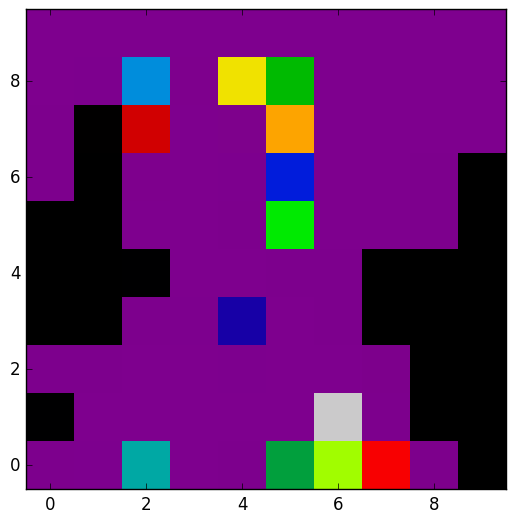

In [47]:
@time coloreando(grupos, 10,10);

In [48]:
charged, original = cargas(bongo, volteado, grupos);

In [49]:
function merones(clusters, cargas, alto, ancho)
    grupos = length(clusters)
    mat = zeros(alto,ancho)
    for i in 1:grupos
        for coord in clusters[i]
            mat[coord...] = cargas[i]
        end
    end
    c_min, c_max = extrema(cargas)
    partes = round(Int64, 2*(c_max-c_min)+1.0)
    
    imshow(mat,origin = "lower", interpolation = "none", cmap =  get_cmap("gnuplot", partes))
    #matshow(mat,origin = "lower", interpolation = "none", cmap =  plt[:cm][:get_cmap]("gnuplot", partes))
    
    #matshow(mat,origin = "lower", interpolation = "none",cmap="viridis")
    # hsv, prism, Set1, plasma, inferno, viridis, gist_ncar, nipy_spectral
    
    colorbar(fraction = 0.045, ticks=linspace(c_min,c_max,partes))
end

merones (generic function with 1 method)

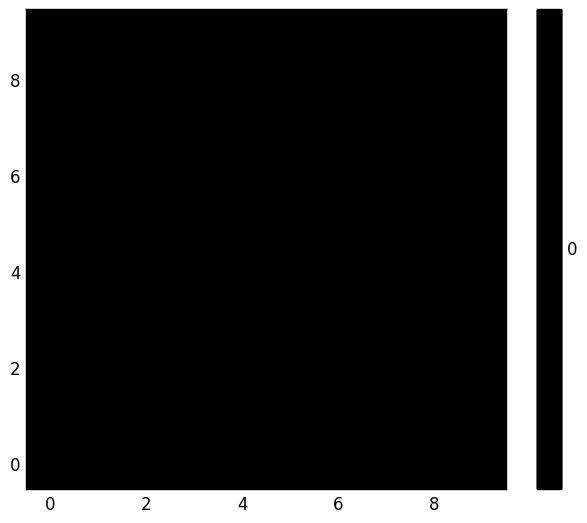

PyObject <matplotlib.colorbar.Colorbar object at 0x7f3c6ce06590>

In [50]:
merones(grupos,charged, 10,10)

+ http://matplotlib.org/users/colormaps.html
+ http://stackoverflow.com/questions/33855986/matplotlib-discretize-colorbar-between-given-values
+ http://stackoverflow.com/questions/18704353/correcting-matplotlib-colorbar-ticks
+ http://matplotlib.org/api/cm_api.html?highlight=get_cmap#matplotlib.cm.get_cmap

In [51]:
#get_cmaps()  #Muestra todos los colormaps disponibles...

#### Evolución

In [52]:
function wang!(σ, Σ, clusters)
    for cluster in clusters
        if rand() < 0.5
            for coord in cluster
                σ[coord...] = Σ[coord...]
            end
        end
    end
end

wang! (generic function with 1 method)

In [53]:
function evol!(σ, pasos, β = 1.0; graficos = "false")
    
    renglones, columnas = size(σ)
    cargas_totales = zeros(pasos)
    
    for m in 1:pasos
        n = rand_spin()
        clusters, Σ = multicluster(σ, n, β)
        charges, origin = cargas(σ, Σ, clusters)
        cargas_totales[m] = origin
        
        if graficos == "cluster"
            coloreando(clusters, renglones,columnas)
        elseif graficos == "meron"
            merones(clusters, charges, renglones,columnas)
        end
        wang!(σ, Σ, clusters)
    end
    if graficos == "false"
        mean(cargas_totales.^2)/(renglones*columnas), std(cargas_totales.^2)/sqrt(pasos+1)
    end
end

evol! (generic function with 2 methods)

In [54]:
@time evol!(bongo, 1000)

  2.854663 seconds (44.32 M allocations: 1.557 GB, 5.12% gc time)


(0.01677,0.08229628043039243)

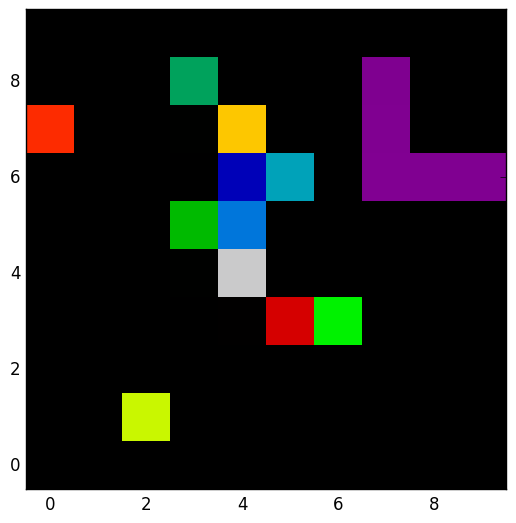

In [55]:
evol!(bongo, 2, 10.; graficos = "cluster")

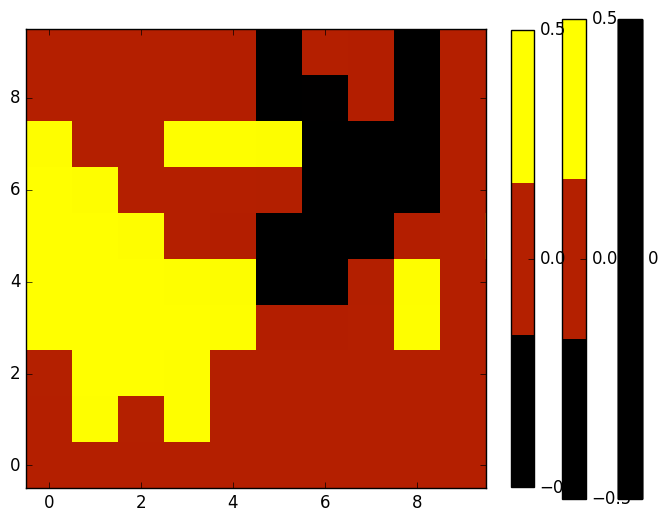

In [56]:
evol!(bongo, 3, 1.; graficos = "meron")

### Multi-cluster constrained Action

In [57]:
function constructor_constreñido!(clusters, Σ, σ, alto, ancho, coord, direccion, δ = 2π/3)  
    aglomerado = [coord]
    frontera = [coord]
    pared = 1
    
    while pared != 0
        k = rand(1:pared)
        fronterizo = frontera[k]
        
        Σ[fronterizo...] = σ[fronterizo...] - 2(σ[fronterizo...]⋅direccion)*direccion
        
        for vecino in vecinos(fronterizo, alto, ancho)
            
            if !in(vecino, aglomerado)
                if !buscador(vecino, clusters)
                    
                    θ = acos( σ[vecino...] ⋅ Σ[fronterizo...] ) #Ángulo tras voltear
                    
                    if abs(θ) > δ
                        push!(aglomerado, vecino)
                        push!(frontera, vecino)
                        pared += 1
                    end
                end
            end                
        end
        deleteat!(frontera, k)
        pared -= 1    
    end
    push!(clusters, aglomerado)
end

constructor_constreñido! (generic function with 2 methods)

In [58]:
function multicluster_constreñido(σ, direccion, δ = 2π/3) # σ es el arreglo de espines  
    
    alto, ancho = size(σ)
    Σ = copy(σ)
    
    clusters = Vector{Tuple{Int64,Int64}}[] # arreglo con vector de tuplas
    
    coords = vcat([(i,j) for i in 1:alto, j in 1:ancho]...)
    largo = length(coords)  #alto*ancho
    
    while largo != 0
        n = rand(1:largo)
        if !buscador(coords[n], clusters)
            constructor_constreñido!(clusters, Σ, σ, alto, ancho, coords[n], direccion, δ)
        end
        deleteat!(coords, n)
        largo -= 1
    end
    clusters, Σ
end

multicluster_constreñido (generic function with 2 methods)

In [59]:
function evol_constreñido!(σ, pasos, δ = 2π/3; graficos = "false")
    
    renglones, columnas = size(σ)
    cargas_totales = zeros(pasos)
    
    for m in 1:pasos
        n = rand_spin()
        clusters, Σ = multicluster_constreñido(σ, n, δ)
        charges, origin = cargas(σ, Σ, clusters)
        cargas_totales[m] = origin
        
        if graficos == "cluster"
            coloreando(clusters, renglones,columnas)
        elseif graficos == "meron"
            merones(clusters, charges, renglones,columnas)
        end
        wang!(σ, Σ, clusters)
    end
    if graficos == "false"
        mean(cargas_totales.^2)/(renglones*columnas), std(cargas_totales.^2)/sqrt(pasos)
    end
end

evol_constreñido! (generic function with 2 methods)

In [60]:
L = 16
snoop = [[1.0,0.0,0.0] for i in 1:L, j in 1:L];

In [61]:
delta = 0.55π
pasitos = 100
@time evol_constreñido!(snoop, pasitos, delta)

  1.305186 seconds (25.48 M allocations: 907.078 MB, 6.00% gc time)


(0.0025,0.1096551066947747)

#### Aquí algo falla por alguna razón.

#### El error disminuye demasiado lento, y el proceso en general es lento. 

### Single-cluster constrained action

In [62]:
function volteo_constreñido!(σ, pasos, δ = 2π/2)
    tamaño = size(σ)
    alto = tamaño[1]
    ancho = tamaño[2]
    
    for i in 1:pasos
        
        r = rand_spin() #[1,0,0]
        coord = (rand(1:alto), rand(1:ancho))
        aglomerado = [coord]
        frontera = [coord]
        pared = 1
        #seguro = 0
        
        while (pared != 0) #& (seguro<10000)
            
            k = rand(1:pared)
            elegido = frontera[k]
            σ[elegido...] -= 2(σ[elegido...]⋅r)*r
            
            for vecino in vecinos(elegido, alto, ancho) 
                
                if !in(vecino, aglomerado)
                    
                    θ = acos( σ[vecino...] ⋅ σ[elegido...] ) #Ángulo tras voltear
                    
                    if abs(θ) > δ
                        push!(aglomerado, vecino)
                        push!(frontera, vecino)
                        pared += 1
                    end
                end 
            end
            deleteat!(frontera, k)
            pared -= 1
            #seguro += 1
        end
        # @show aglomerado
    end
end

volteo_constreñido! (generic function with 2 methods)

In [63]:
function evolution_single_constreñido!(σ, pasos, δ = 2π/3)
    n,m = size(σ)
    V = n*m
    
    cargas = zeros(pasos+1)
    carga_cluster = zeros(pasos)
    #cargas[1] = triangulador(σ)
    cargas[1] = round(2triangulador(σ))/2
    for i in 1:pasos
        volteo_constreñido!(σ, 1, δ)
        #cargas[i+1] = triangulador(σ)
        cargas[i+1] = round(2triangulador(σ))/2
        carga_cluster[i] = (cargas[i+1] - cargas[i])/2
    end
    cargas, carga_cluster, mean(cargas.^2)/V, std(cargas.^2)/sqrt(pasos+1)
end

evolution_single_constreñido! (generic function with 2 methods)

## Relación carga-tamaño de cluster

In [64]:
function tamaño_islas!(diccionario, clusters, cargas)
    for (i,carguita) in enumerate(cargas)
        registro = get!(diccionario, carguita, Int64[])
        diccionario[carguita] = push!(registro, length(clusters[i]))
    end
end

tamaño_islas! (generic function with 1 method)

In [65]:
function carga_tamaño!(σ, pasos, δ = 2π/3)
    renglones, columnas = size(σ)
    diccionario = Dict{Float64, Vector{Int64}}()
    for m in 1:pasos
        n = rand_spin()
        clusters, Σ = multicluster_constreñido(σ, n, δ)
        charges, carga_total = cargas(σ, Σ, clusters)
        tamaño_islas!(diccionario, clusters, charges)
        wang!(σ, Σ, clusters)
    end
    
    resultados = Dict{Float64, Tuple{Int64,Float64,Float64}}()
    for k in keys(diccionario)
        veces = length(diccionario[k])
        resultados[k] = (veces, mean(diccionario[k]), std(diccionario[k])/sqrt(veces))
    end
    resultados
end

carga_tamaño! (generic function with 2 methods)

In [66]:
tam = 1200
clusters = [[(rand(1:10),rand(1:10)) for k in 1:rand(1:10)] for i in 1 : tam]
charges = rand([0.5,0.0,-0.5],tam)
boba = Dict{Float64,Vector{Int64}}()

Dict{Float64,Array{Int64,1}} with 0 entries

In [67]:
tamaño_islas!(boba, clusters, charges)

In [68]:
L = 8
snoop = [[1.0,0.0,0.0] for i in 1:L, j in 1:L];
@time carga_tamaño!(snoop, 1000, 2π/3)

  1.344885 seconds (22.71 M allocations: 824.571 MB, 6.51% gc time)


Dict{Float64,Tuple{Int64,Float64,Float64}} with 7 entries:
  0.0  => (35835,1.3419840937630807,0.006618739632448591)
  0.5  => (2473,3.028710068742418,0.05807323769611086)
  -1.0 => (101,6.217821782178218,0.4163975538481236)
  1.5  => (2,8.5,1.4999999999999998)
  -1.5 => (3,13.0,1.7320508075688774)
  -0.5 => (2407,2.9621936019941835,0.05531470562136196)
  1.0  => (86,7.046511627906977,0.5545254627600957)